### Description of SVM under OVR setting

In OVR, a multi-class problem is divided into multiple binary-classification problems. For each class, an SVM classifier is trained to distinguish it from other classes. So totally 10 SVM classifiers are built, each corresponding to an MNIST digit(0-9).

To predict the class for a new input, all the classifiers are evaluated on the new input and the class corresponding to classifier with highest probability for its positive class is assigned as a label.

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, y = mnist['data'], mnist['target']

In [ ]:
import numpy as np

y = y.astype(np.uint8)
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.preprocessing import normalize
print(X.min(), X.max())
X = normalize(X)

0.0 255.0


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, stratify=y)

In [ ]:
# Getting small validation set

X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)


Now we will try to find the best hyperparameter values based on small validation set.

In [ ]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Define a range of possible C values to test
param_grid = {'estimator__C': [0.005, 0.01, 0.1, 0.5, 1.0, 5.0]}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(OneVsRestClassifier(SVC(kernel='linear', class_weight='balanced')), param_grid, cv=5)

# Fit the grid search to the validation data
grid_search.fit(X_val, y_val)

# The best C value based on cross-validation
best_C = grid_search.best_params_['estimator__C']
print(f"Best C: {best_C}")


Best C: 5.0


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
ovr_clf = OneVsRestClassifier(SVC(kernel = 'linear', C=best_C, class_weight='balanced'))
ovr_clf.fit(X_train, y_train)

print("The number of estimators created: ", len(ovr_clf.estimators_))

# Let us get the predictions from OvRClassifier
ovr_predictions = ovr_clf.predict(X_test)

print(ovr_predictions)
print(ovr_predictions.shape)

# Find out the accuracy of our classifier
print("Accuracy: ",ovr_clf.score(X_test, y_test))

The number of estimators created:  10
[5 1 3 8 9 2 9 4 4 1 4 7 6 5 5 0 9 3 6 3 3 9 7 0 7 9 2 8 8 6 7 0 7 2 1 5 8
 9 8 0 0 6 1 0 4 5 9 7 0 5 0 0 0 3 1 6 3 6 6 1 0 2 1 2 0 4 7 6 8 5 8 8 2 5
 1 0 1 8 2 2 9 5 2 7 0 0 3 1 9 4 6 7 5 1 7 4 4 3 6 4 7 6 6 7 1 1 9 9 3 1 3
 5 3 4 6 8 3 2 1 3 8 9 7 4 8 7 0 6 1 6 7 8 0 6 3 3 4 4 3 9 7 7 1 5 5 3 6 4
 2 4 9 2 4 2 9 8 9 3 5 8 8 7 2 0 9 5 5 2 1 9 6 6 6 4 9 8 1 1 5 4 7 2 8 9 3
 1 8 8 8 7 2 3 2 0 2 9 2 7 8 1]
(200,)
Accuracy:  0.91


The accuracy that was reached is 91%

Text(0.5, 427.9555555555555, 'Predicted label')

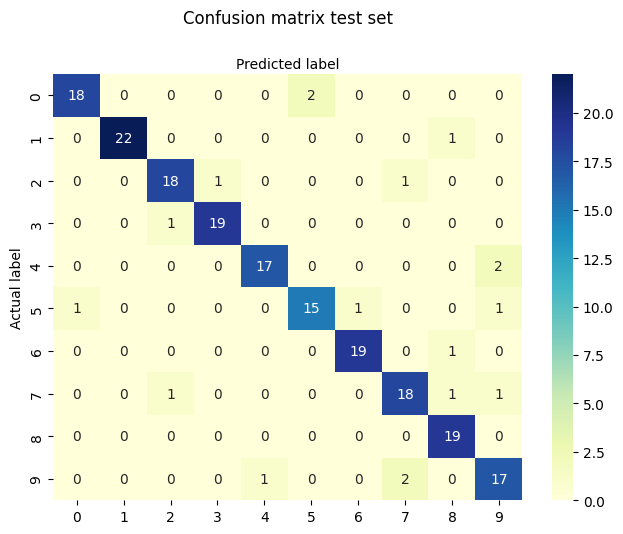

In [ ]:
# Printing the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

C = confusion_matrix(y_test,ovr_predictions)

fig, ax = plt.subplots()
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(C), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix test set', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')